In [ ]:
importer les bibliotheques necessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 lire les donnes de fichier csv

In [3]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Distribution des classes:

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

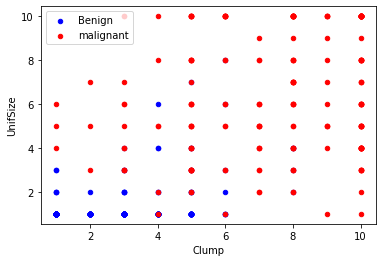

In [4]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant',ax=axes)

#help(benign_df.plot)

identifying unwanted objects

In [5]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

remove unwanted collumns

In [6]:
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#independant var
x = np.asarray(feature_df)
y = np.asarray(cell_df['Class'])

y[0:5]

array([2, 2, 2, 2, 2])

deviding data as train/test set

In [8]:
#cell_df (100)    train(80) / test(20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(137, 9)

modeling

In [11]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma ='auto', C=2)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

Evalution (comparer y_test et y_predict)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

